In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/desktop/rypy')

In [2]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
% matplotlib inline

In [3]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [4]:
logstrikes = pd.read_csv('surface-strikes.csv',index_col=0)
vols = pd.read_csv('surface-vols.csv',index_col=0)

In [5]:
logstrikes

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
3M,-0.116317,-0.078161,-0.061862,-0.050343,-0.041019,-0.032942,-0.025647,-0.018862,-0.012409,-0.006157,...,0.006157,0.012409,0.018862,0.025647,0.032942,0.041019,0.050343,0.061862,0.078161,0.116317
6M,-0.180947,-0.121590,-0.096234,-0.078316,-0.063811,-0.051246,-0.039897,-0.029342,-0.019303,-0.009578,...,0.009578,0.019303,0.029342,0.039897,0.051246,0.063811,0.078316,0.096234,0.121590,0.180947
9M,-0.241761,-0.162455,-0.128577,-0.104636,-0.085256,-0.068468,-0.053305,-0.039203,-0.025791,-0.012797,...,0.012797,0.025791,0.039203,0.053305,0.068468,0.085256,0.104636,0.128577,0.162455,0.241761
1Y,-0.302425,-0.203219,-0.160840,-0.130892,-0.106649,-0.085649,-0.066681,-0.049040,-0.032263,-0.016008,...,0.016008,0.032263,0.049040,0.066681,0.085649,0.106649,0.130892,0.160840,0.203219,0.302425


In [6]:
vols

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
3M,0.156675,0.124513,0.109667,0.098638,0.089309,0.080881,0.072940,0.065231,0.057582,0.049923,...,0.037447,0.037686,0.040936,0.045162,0.049867,0.055012,0.060776,0.067609,0.076778,0.096385
6M,0.174617,0.141916,0.126765,0.115500,0.105977,0.097392,0.089335,0.081564,0.073932,0.066394,...,0.053025,0.049936,0.050409,0.052965,0.056585,0.060929,0.066018,0.072201,0.080612,0.098722
9M,0.189826,0.156752,0.141411,0.130011,0.120389,0.111735,0.103642,0.095874,0.088294,0.080854,...,0.067186,0.062477,0.060582,0.061243,0.063562,0.066979,0.071347,0.076904,0.084673,0.101714
1Y,0.203556,0.170258,0.154818,0.143358,0.133704,0.125042,0.116967,0.109247,0.101747,0.094409,...,0.080657,0.075123,0.071556,0.070367,0.071192,0.073495,0.077010,0.081860,0.088956,0.105023


In [7]:
ξ = np.array([[0/12,0.10**2],
              [3/12,0.12**2],
              [6/12,0.14**2],
              [9/12,0.16**2]])
# ξ = np.array([[0/12,0.13**2]])
ρ,ν,H,ɛ = -0.7,0.3,-0.5,1
θ = ξ,ρ,ν,H,ɛ

In [8]:
# t = 0.75
# T = rp.truncate_curve(ξ[:,0],t)
# # ξ = ξ[:len(T),1]
# ξ = ξ[:len(T)-1,1]
# Δξ = np.ediff1d(ξ,to_begin=ξ[0])
# ΔTA = np.ediff1d(T)
# ΔTB = t - T[:-1]
# ΔTA
# # ΔTB
# ξ

In [9]:
print('reversion speed =', ɛ**-1)
print('vol vol =', ν*ɛ**(H - 0.5))

reversion speed = 1.0
vol vol = 0.3


In [30]:
ξ0 = 0.08**2
ξ1 = 0.12**2
α,β,ρ = 0.0001,2**8,-0.
θ = ξ0,ξ1,α,β,ρ

In [40]:
T = np.array([1])[:,nx]
M = ['1Y']
Δ = np.linspace(1,99,21)[nx,:]/100
k = norm.ppf(Δ)*0.10*np.sqrt(T)
# k = np.array(logstrikes)

In [32]:
# T = np.array([3/12,6/12,9/12,1])[:,nx]
# M = ['3M','6M','9M','1Y']
# Δ = np.linspace(1,99,21)[nx,:]/100
# k = norm.ppf(Δ)*np.sqrt(np.max(ξ[:,1])*T)
# k = np.array(logstrikes)

In [33]:
pd.DataFrame(k,index=M,columns=Δ[0,:])

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
6M,-0.213847,-0.143698,-0.113731,-0.092555,-0.075412,-0.060563,-0.047151,-0.034677,-0.022813,-0.011319,...,0.011319,0.022813,0.034677,0.047151,0.060563,0.075412,0.092555,0.113731,0.143698,0.213847
1Y,-0.302425,-0.203219,-0.160840,-0.130892,-0.106649,-0.085649,-0.066681,-0.049040,-0.032263,-0.016008,...,0.016008,0.032263,0.049040,0.066681,0.085649,0.106649,0.130892,0.160840,0.203219,0.302425


In [34]:
# pd.DataFrame(k,index=M,columns=Δ[0,:]).to_csv('strikes-sigma-13.csv')

In [35]:
C = rp.pricer(T,k,θ)

In [36]:
BSV = rp.surface(T,k,C)

In [37]:
pd.DataFrame(BSV,index=M,columns=Δ[0,:])

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
6M,0.150776,0.150775,0.150775,0.150775,0.150775,0.150775,0.150775,0.150775,0.150775,0.150775,...,0.150775,0.150775,0.150775,0.150775,0.150775,0.150775,0.150775,0.150775,0.150775,0.150776
1Y,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,...,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844,0.109844


In [38]:
# pd.DataFrame(BSV,index=M,columns=Δ[0,:]).to_csv('vols-sigma-13.csv')

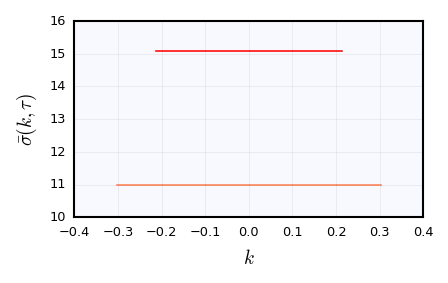

In [39]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')
#     axes.set_ylim([0,30])

In [20]:
BSV_MKT = np.array(vols)

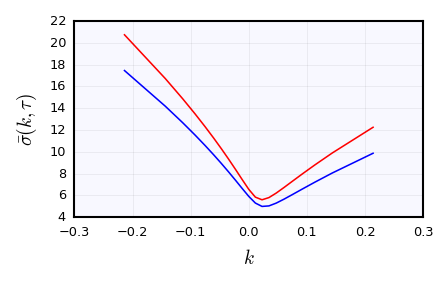

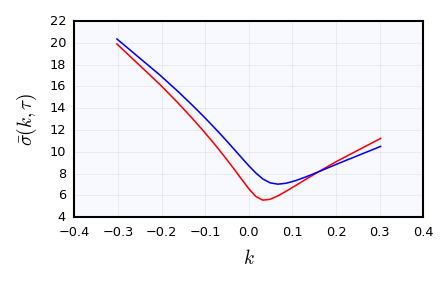

In [21]:
for i in range(len(T[:,0])):
    plot,axes = plt.subplots()
    axes.plot(k[i,:],100*BSV[i,:],'r')
    axes.plot(k[i,:],100*BSV_MKT[2*i+1,:],'b')
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')
#     axes.set_ylim([0,30])

In [ ]:
ξ0 = 0.10**2
ξ1 = 0.14**2
α,β,ρ = 0.5,256/16,-0.7
params = ξ0,ξ1,α,β,ρ
def char_func(u,t,params):
    ξ0,ξ1,α,β,ρ = params
    κ,λ = β,α*β
    i=1j
    d = np.sqrt((ρ*λ*u*i-κ)**2+λ**2*(i*u+u**2))
    g1 = (κ-ρ*λ*i*u+d)/(κ-ρ*λ*i*u-d)
    g2 = 1/g1
    
    A  = (ξ0 -  0)*κ*λ**-2*((κ-ρ*λ*i*u-d)*t-2*np.log((1-g2*np.exp(-d*t))/(1-g2)))
    A += (ξ1 - ξ0)*κ*λ**-2*((κ-ρ*λ*i*u-d)*0.5-2*np.log((1-g2*np.exp(-d*0.5))/(1-g2)))
    B  = ξ0*λ**-2*(κ-ρ*λ*i*u-d)*(1-np.exp(-d*0.5))/(1-g2*np.exp(-d*0.5))
    B += ξ1*λ**-2*(κ-ρ*λ*i*u-d)*(1-np.exp(-d*0.5))/(1-g2*np.exp(-d*0.5))
    
    return np.exp(A + B)